# Introduction to Machine Learning (CSCI-UA.473)

### Homework 4
#### Due: November $30^{th}$, 2023 at 11:59PM


#### Name: Yiqi Rao
#### Email: yr2071@nyu.edu

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
## Use the same dataset that was released with HW1
data = pd.read_csv('/content/drive/MyDrive/FML_Fall23_HW/HW4/FML2023_HW1_Dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Create an imbalanced target variable
y= np.where(y > np.percentile(y, 50), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mounted at /content/drive


### Question 1: Nearest Neighbor Classifier (15 points)

**Task 1.1 (10 points)** The k-NN algorithm is relatively simple and is based on the assumption that similar things exist in close proximity.

The steps for the k-NN algorithm are as follows:

- Choose the number of $k$ neighbors
- For each example in the test data, do the following:
  - Calculate the distance between the test data example and each example in the training data. You can use the Euclidean distance for this exercise.
  - Sort the distances in increasing order
  - Select the $k$ nearest training examples that are closest to the test example: corresponding to the first $k$ distances from this sorted list
  - Get the labels of the selected $k$ training examples
  - Return the mode of the $k$ labels
  - The prediction is the most common class among the $k$ nearest neighbors

**Task 1.2 (5 points):** Compare the test accuracy of KNN with $k=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]$. Plot the accuracy curve with the number of neighbors $k$ on the x-axis and the accuracy on the test set on the y-axis. How does changing this parameter affect the performance of the KNN?


In [2]:
import statistics
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        X = X.to_numpy()
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        len_train = self.X_train.shape[0]
        dist_list = []
        for i in range(len_train):
          dist = np.linalg.norm(x - self.X_train.iloc[i])
          dist_list.append(dist)
        sort_index = np.argsort(dist_list)
        label_list = []
        for kn in range(self.k):
          label = self.y_train[sort_index[kn]]
          label_list.append(label)
        mode = statistics.mode(label_list)
        return mode

Text(0, 0.5, 'Accuracy')

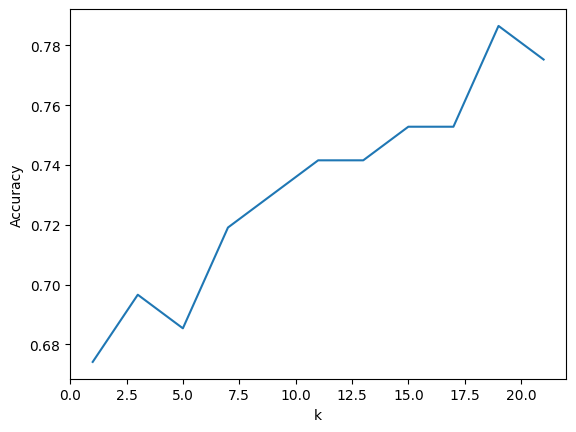

In [3]:
## Add code here
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_list = [1,3,5,7,9,11,13,15,17,19,21]
acc_list = []
for k in k_list:
  knn = KNN(k=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  acc_list.append(acc)
plt.plot(k_list,acc_list)
plt.xlabel('k')
plt.ylabel('Accuracy')

The test accuracy generally increases as k increases.

### Question 2: Decision Trees (20 points)

**Task 2.1 (5 points):** Train a Decision tree classifier and evaluate its performance on the test set. You can use existing python libraries for this question.

**Task 2.2 (10 points):** Visualize the generated decision tree and answer the following questions:
- Identify and describe the decision-making process at the root node. What feature is used to make the first split by the classifier, and what is the threshold value?
- For any two leaf nodes, explain the path (in terms of decisions made) from the root to the leaf.

**Task 2.3 (5 points):**
- Train multiple Decision Tree classifiers with different values of max_depth ranging from 1 to 15 on the HW1 dataset.
- For each classifier, compute and plot the accuracy on both the training set and the test set.
- Create a plot that has max_depth on the x-axis and test accuracy on the y-axis. Analyze the plots to determine the max_depth at which the decision tree begins to overfit. What is it?

In [110]:
## Add code here
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Decision Tree Classifier is {acc}')

Accuracy of the Decision Tree Classifier is 0.6741573033707865


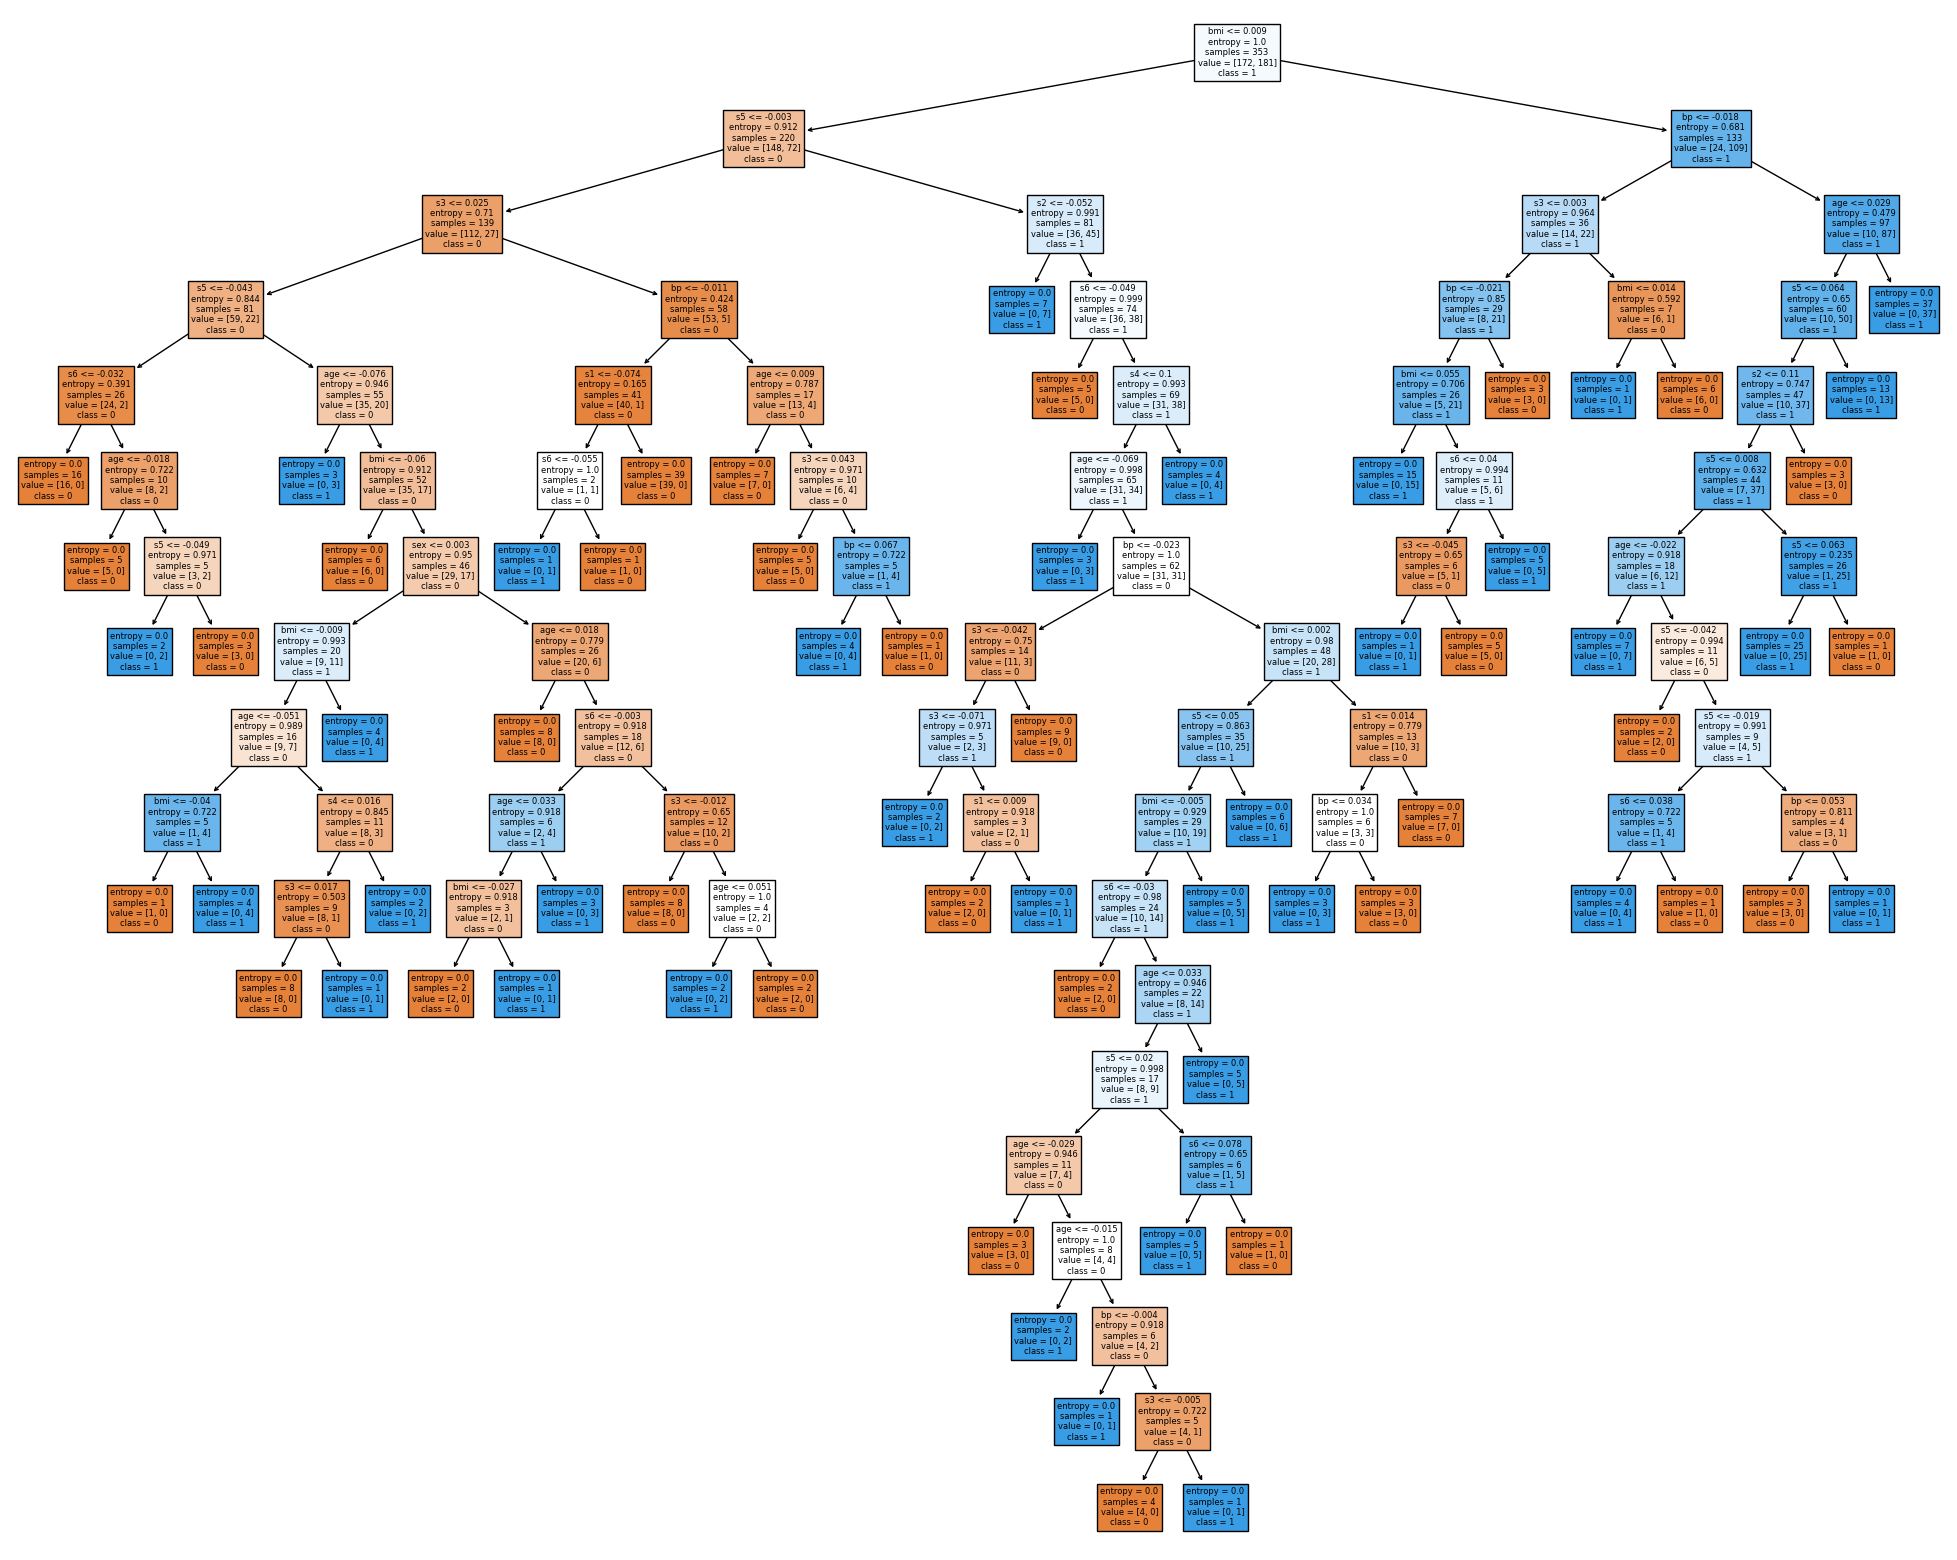

In [5]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=(list(data.columns))[:-1],class_names=['0','1'],filled=True)

* bmi is used to make the first split by the classifier at the root node. And the threshold value is 0.009.
* The 1st leaf node: We have 220 out of 353 where bmi<=0.009. Then, we have 81 out of 220 where s5>-0.003. Then, we have 7 out of 81 where s2<=-0.052. And they are all in class 1.
* The 2nd leaf node: We have 133 out of 353 where bmi>0.009. Then, we have 97 out of 133 where bp>-0.018. Then, we have 37 out of 97 where age>0.029. And they are all in class 1.

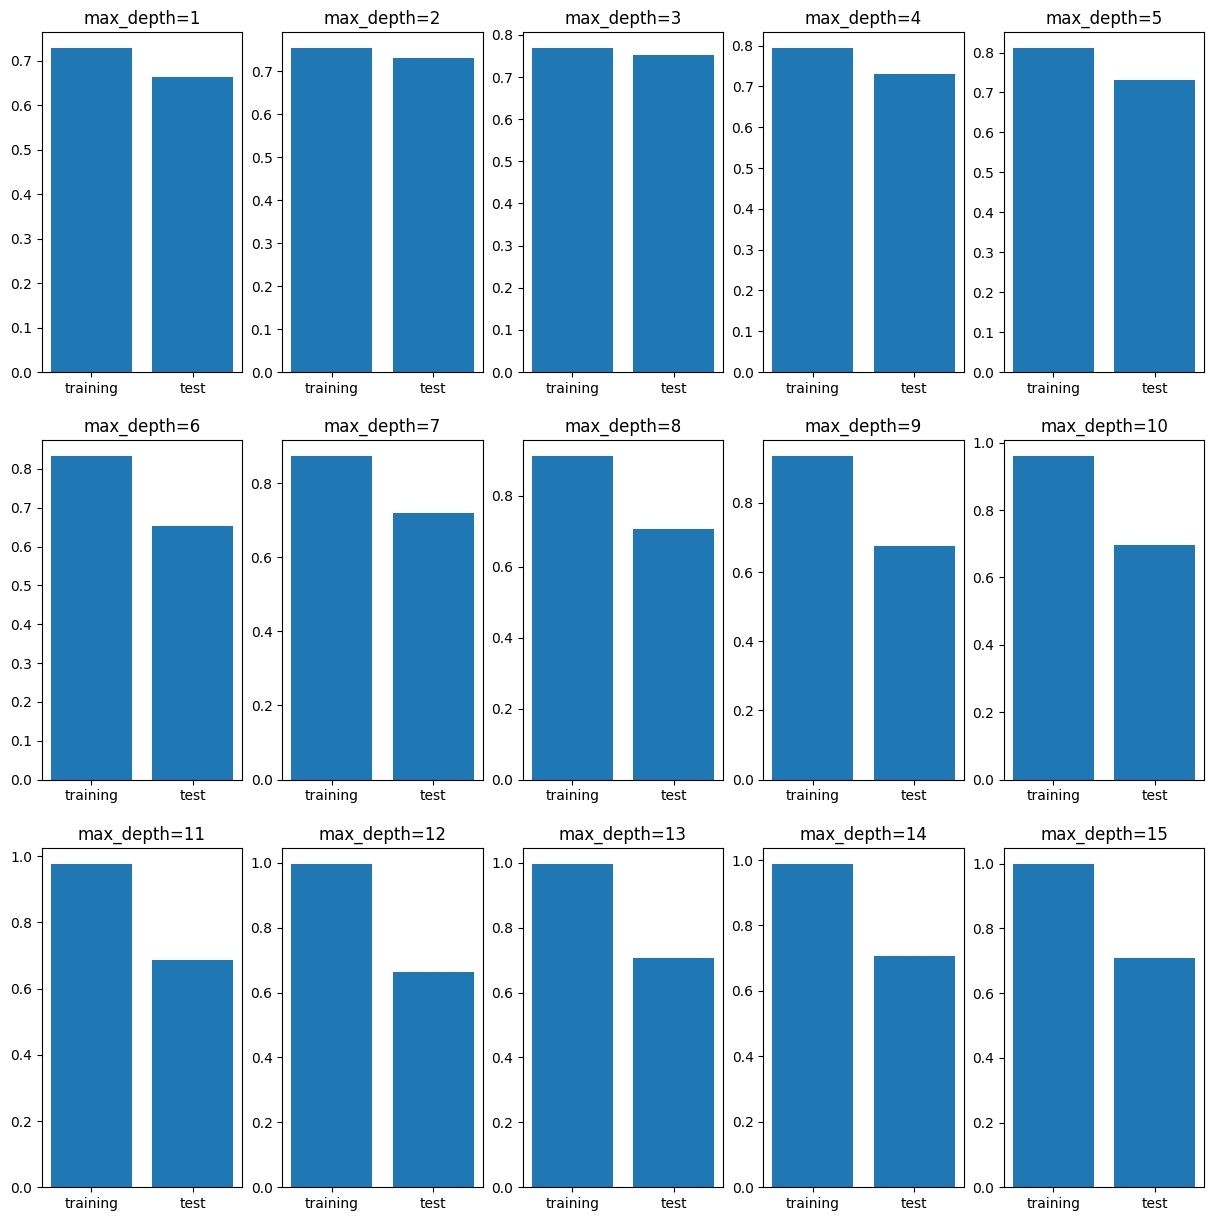

In [111]:
max_depth_list = range(1,16)
acc_list = []
fig = plt.figure(figsize=(15,15))
for max_depth in max_depth_list:
  clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=max_depth)
  clf.fit(X_train,y_train)
  y_pred_train = clf.predict(X_train)
  acc_train = accuracy_score(y_train,y_pred_train)
  y_pred_test = clf.predict(X_test)
  acc_test = accuracy_score(y_test,y_pred_test)
  acc_list.append(acc_test)
  ax = fig.add_subplot(3,5,max_depth)
  plt.bar(['training','test'],[acc_train,acc_test])
  ax.title.set_text(f'max_depth={max_depth}')

Text(0, 0.5, 'Accuracy')

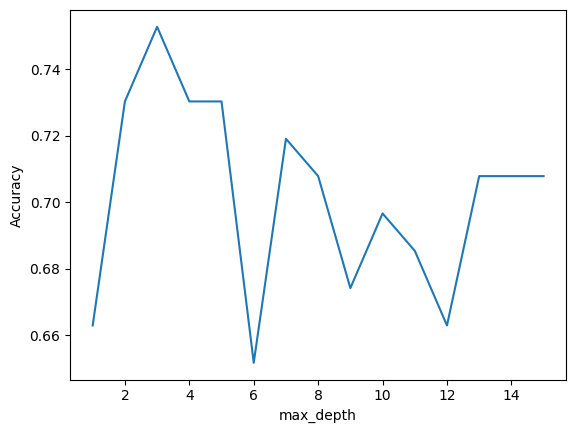

In [112]:
plt.plot(max_depth_list,acc_list)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

The decision tree begins to overfit at max_depth=4.

## Question 3: Bagging and Boosting (30 points)

**Task 3.1 (15 points)** Implement bagging from scratch by completing the CustomBaggingClassifier Class.

**Task 3.2 (5 points)** Evaluate the performance of the bagged classifier on the test set. Compare its performance with a single decision tree. What is the difference between the performance of the two?

In [113]:
import numpy as np
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class CustomBaggingClassifier:
    def __init__(self, base_estimator=DecisionTreeClassifier(), n_estimators=10, bootstrap_size=None):
        """
        Initialize the CustomBaggingClassifier.

        Parameters:
        base_estimator: The base model to use (default is DecisionTreeClassifier).
        n_estimators: The number of base models in the ensemble.
        bootstrap_size: The number of samples to draw from X to train each base model.
        """
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.bootstrap_size = bootstrap_size
        self.models = []

    def _bootstrap(self, X, y):
        """
        Create a bootstrap sample of the dataset.

        Fill in this method to generate a bootstrap sample.
        """
        # TODO: Implement bootstrapping
        len_X = X.shape[0]
        index = [i for i in range(len_X)]
        indices = np.random.choice(index, size=self.bootstrap_size, replace=True)
        X_sampled = X.iloc[indices]
        y_sampled = y[indices]
        return X_sampled, y_sampled

    def fit(self, X, y):
        """
        Fit the bagging ensemble classifier.

        Fill in this method to train n_estimators of the base_estimator on
        different bootstrap samples of the dataset.
        """
        # TODO: Implement the fitting process
        for _ in range(self.n_estimators):
            X_sampled, y_sampled = self._bootstrap(X, y)
            clf = self.base_estimator.__class__()
            clf.fit(X_sampled, y_sampled)
            self.models.append(clf)
        return self.models

    def predict(self, X):
        """
        Make predictions with the bagging ensemble classifier.

        Fill in this method to aggregate predictions from all base models.
        """
        # TODO: Implement the prediction process
        preds = []
        for m in self.models:
            y_pred = m.predict(X)
            preds.append(y_pred.reshape(-1,1))
        y_preds = np.round(np.mean(np.concatenate(preds,axis=1),axis=1)).astype(int)
        return y_preds

    def score(self, X, y):
        """
        Return the accuracy of the bagging ensemble classifier on the provided data and labels.
        """
        predictions = self.predict(X)
        return accuracy_score(y, predictions)


In [118]:
## Add code to evaluate the bagging classifier on the test set
model = CustomBaggingClassifier(bootstrap_size=X_train.shape[0])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc_b = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Bagged Classifier is {acc_b}')

Accuracy of the Bagged Classifier is 0.6853932584269663


The accuracy of the bagged classfier is higher than that of a single decision tree. (0.685 > 0.674)

**Task 3.3 (5 points):** Implement AdaBoost and Gradient Boosting with the base estimator as a decision tree with depth = 1. Compare the accuracy between these two models. You can use the pre-built functions from any Python library.  

**Task 3.4 (5 points):** Find the optimal number of models in bagging, AdaBoost and Gradient Boosting and compare the accuracy between these three ensemble variants before and after the grid search.

In [119]:
## Add code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

abc = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1))
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)
acc_a = accuracy_score(y_test,y_pred)
print(f'Accuracy of the AdaBoost is {acc_a}')

gbc = GradientBoostingClassifier(max_depth=1)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
acc_g = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Gradient Boosting is {acc_g}')

Accuracy of the AdaBoost is 0.6741573033707865
Accuracy of the Gradient Boosting is 0.7303370786516854


The accuracy of the AdaBoost is lower than that of the Gradient Boosting.

In [122]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': list(range(10,301,10))}

bc = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=1))
gsc_bc = GridSearchCV(bc, param_grid, scoring='accuracy')
gsc_bc.fit(X_train, y_train)
y_pred = gsc_bc.predict(X_test)
acc_bc = accuracy_score(y_test,y_pred)

abc = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1))
gsc_abc = GridSearchCV(abc, param_grid, scoring='accuracy')
gsc_abc.fit(X_train, y_train)
y_pred = gsc_abc.predict(X_test)
acc_abc = accuracy_score(y_test,y_pred)

gbc = GradientBoostingClassifier(max_depth=1)
gsc_gbc = GridSearchCV(gbc, param_grid, scoring='accuracy')
gsc_gbc.fit(X_train, y_train)
y_pred = gsc_gbc.predict(X_test)
acc_gbc = accuracy_score(y_test,y_pred)

print('Before grid search:')
print(f'Accuracy of the Bagged Classifier is {acc_b}')
print(f'Accuracy of the AdaBoost is {acc_a}')
print(f'Accuracy of the Gradient Boosting is {acc_g}')
print('After grid search:')
print(f'Accuracy of the Bagged Classifier is {acc_bc} with {10+gsc_bc.best_index_*10} models')
print(f'Accuracy of the AdaBoost is {acc_abc} with {10+gsc_abc.best_index_*10} models')
print(f'Accuracy of the Gradient Boosting is {acc_gbc} with {10+gsc_gbc.best_index_*10} models')

Before grid search:
Accuracy of the Bagged Classifier is 0.6853932584269663
Accuracy of the AdaBoost is 0.6741573033707865
Accuracy of the Gradient Boosting is 0.7303370786516854
After grid search:
Accuracy of the Bagged Classifier is 0.7078651685393258 with 100 models
Accuracy of the AdaBoost is 0.7191011235955056 with 10 models
Accuracy of the Gradient Boosting is 0.6853932584269663 with 10 models


"\nbest_acc_bag = 0\nbest_acc_ab = 0\nbest_acc_gb = 0\nn_est_list = [10,10,10]\nfor n_estimators in n_estimators_list:\n  model = CustomBaggingClassifier(n_estimators=n_estimators, bootstrap_size=X_train.shape[0])\n  model.fit(X_train,y_train)\n  y_pred = model.predict(X_test)\n  acc_bag = accuracy_score(y_test,y_pred)\n  if acc_bag > best_acc_bag:\n    best_acc_bag = acc_bag\n    n_est_list[0] = n_estimators\n\n  abc = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), n_estimators=n_estimators)\n  abc.fit(X_train,y_train)\n  y_pred = abc.predict(X_test)\n  acc_ab = accuracy_score(y_test,y_pred)\n  if acc_ab > best_acc_ab:\n    best_acc_ab = acc_ab\n    n_est_list[1] = n_estimators\n\n  gbc = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=1)\n  gbc.fit(X_train,y_train)\n  y_pred = gbc.predict(X_test)\n  acc_gb = accuracy_score(y_test,y_pred)\n  if acc_gb > best_acc_gb:\n    best_acc_gb = acc_gb\n    n_est_list[2] = n_estimators\n\nprint('Before grid search:'

### Question 4: Random Forest Classifier (18 points)

**Task 4.1 (3 points):** Construct the random forest classifier with a set of hyper-parameters of your choice. Evaluate its performance on the test set. You can use existing python libraries for this question.

**Task 4.2 (5 points):** Compare the accuracy of random forest with the decision tree classifier. Which one obtains better performance and why?

**Task 4.3 (5 points):** Vary the number of trees in the Random Forest to $[10, 50, 100, 200]$. What effect does changing this parameter have on training and test accuracy?

**Task 4.4 (5 points):** Use cross-validation to find an optimal set of hyperparameters for the Random Forest.

In [88]:
## Add code here
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Random Forest Classifier is {acc_rf}')

Accuracy of the Random Forest Classifier is 0.7303370786516854


The accuracy of the Decision Tree Classifier is 0.6853932584269663. It is lower than the accuracy of the Random Forest Classifier, which is 0.7303370786516854. The reason is that random forests provide an improvement over decision tree by providing a small tweak that decorrelates the individual trees (two sources of randomness: Bagging and Random feature selection at every step), thus obtaining better performance.

In [138]:
n_estimators_list = [10,50,100,200]
for n_estimators in n_estimators_list:
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  rfc.fit(X_train, y_train)
  y_pred_test = rfc.predict(X_test)
  acc_test = accuracy_score(y_test,y_pred_test)
  y_pred_train = rfc.predict(X_train)
  acc_train = accuracy_score(y_train,y_pred_train)
  print(f'With {n_estimators} trees, test accuracy is {acc_test} and train accuracy is {acc_train}')

With 10 trees, test accuracy is 0.7078651685393258 and train accuracy is 0.9801699716713881
With 50 trees, test accuracy is 0.7191011235955056 and train accuracy is 1.0
With 100 trees, test accuracy is 0.7191011235955056 and train accuracy is 1.0
With 200 trees, test accuracy is 0.7415730337078652 and train accuracy is 1.0


The test and train accuracy will generally increase with increasing numbers of trees and converge to a certain value for large number of trees.

In [139]:
from sklearn.model_selection import cross_val_score

best_cvs = 0
n_est = 0
for n_estimators in range(10,301,10):
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  cvs = cross_val_score(rfc, X_train, y_train).mean()
  if cvs > best_cvs:
    best_cvs = cvs
    n_est = n_estimators
print(f'The Random Forest reaches best performance when n_estimators={n_est}')

The Random Forest reaches best performance when n_estimators=80


### Question 5: Histogram and Kernel Density Estimation (17 points)

**Task 5.1 (5 points):** For the BMI feature, plot a histogram with the density estimation with 30 equal width bins and answer the following questions:
- What does the height of a bin in the histogram represent?
- How do outliers affect the histogram shape?

**Task 5.2 (5 points):** Now use different number of bins (e.g., 5, 10, 30, 60, 100) and discuss the differences.

**Task 5.3 (5 points):** Implement Kernel Density Estimation with Gaussian kernels for the BMI feature. Compare the results with the histogram density estimation. Plot your learned density function.

**Task 5.4 (2 points):** How might a doctor use KDE to understand the distribution of a particular health metric (like blood glucose levels) across a population?

Text(0, 0.5, 'Density')

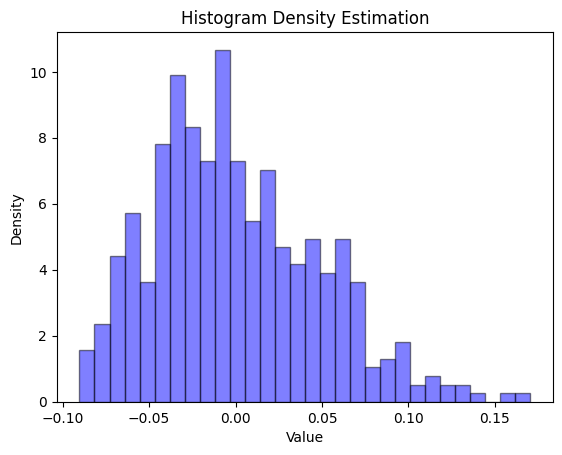

In [170]:
## Add code here
x_vals = np.linspace(-0.2, 0.2, 1000)[:, None]
bmi = data['bmi'].values
plt.hist(bmi, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histogram Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')

* The height of a bin represents the number of bmis that has values within this bin.
* The histogram may be not continous, i.e., there may be bins with density 0 between bins. Also, the histogram may have a bin far away from the main histogram.

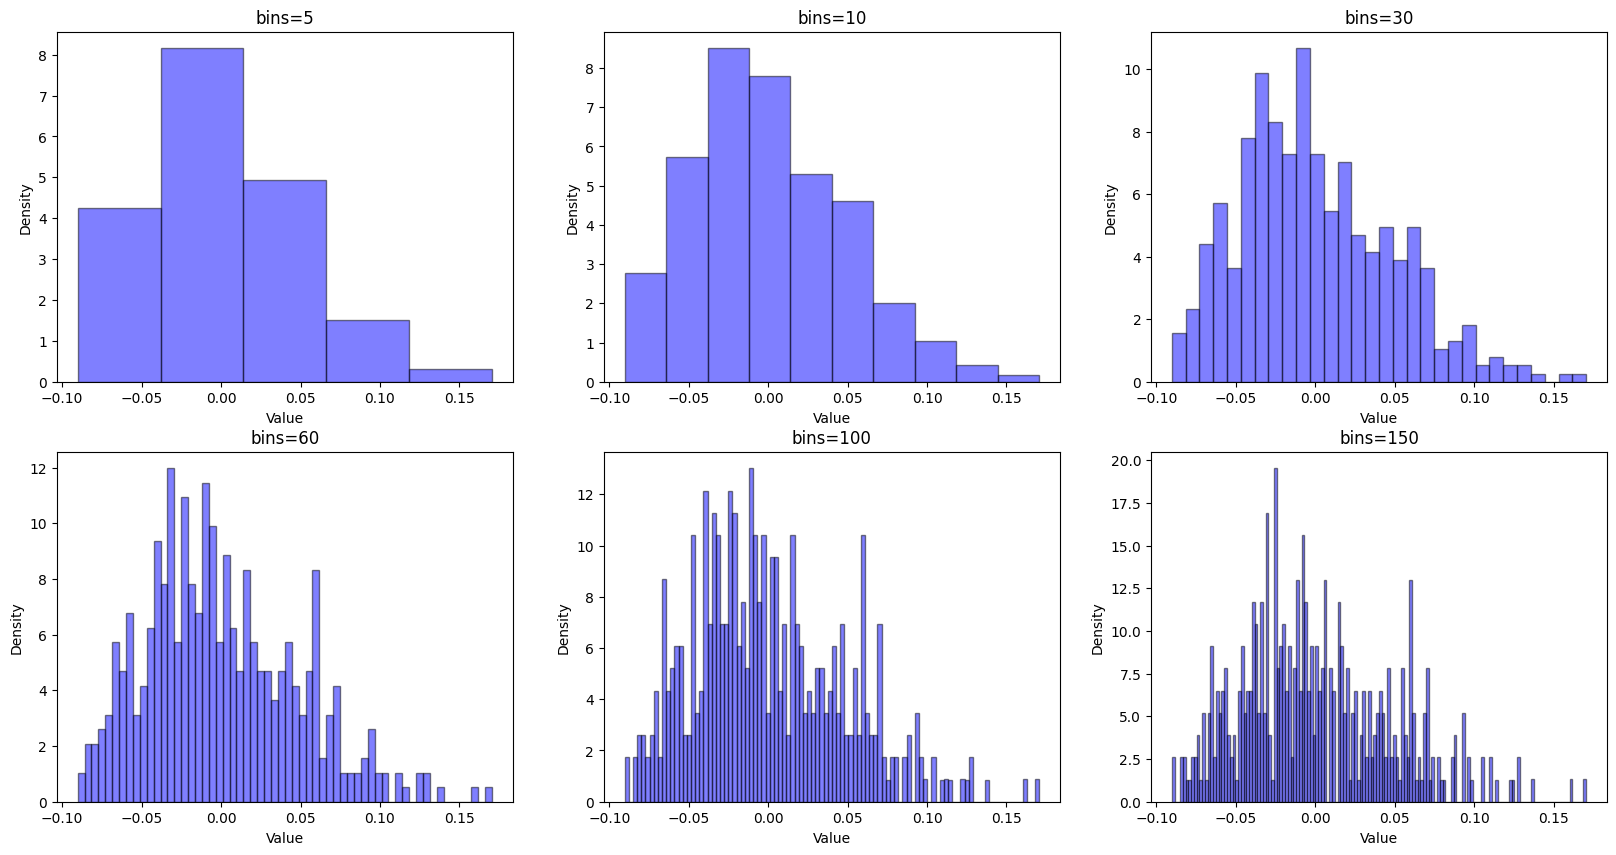

In [171]:
bins_list = [5,10,30,60,100,150]
sp = 1
fig = plt.figure(figsize=(20,10))
for bins in bins_list:
  plt.subplot(2,3,sp)
  sp+=1
  plt.hist(bmi, bins=bins, density=True, alpha=0.5, color='blue', edgecolor='black')
  plt.title(f'bins={bins}')
  plt.xlabel('Value')
  plt.ylabel('Density')

With increasing number of bins, bias decreases but variance increases.

Text(0, 0.5, 'Density')

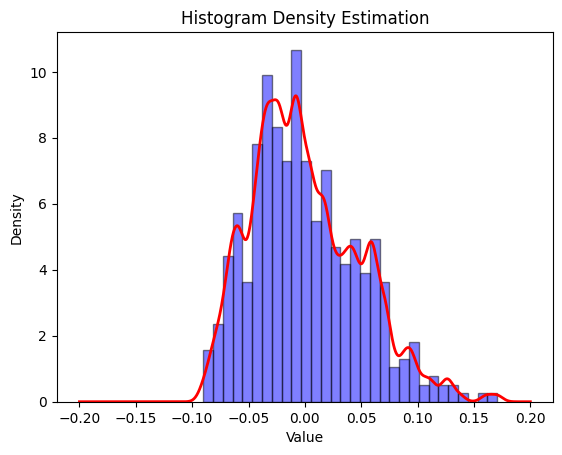

In [172]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=0.005, kernel='gaussian')
kde.fit(bmi[:, None])
log_dens = kde.score_samples(x_vals)
plt.plot(x_vals[:, 0], np.exp(log_dens), color='red', lw=2)
plt.hist(bmi, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histogram Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')

The two estimation follow a similar trend.

KDE offers a continuous approximation of the probability density function a random variable, for example blood glucose levels. And a doctor can use this method to understand the distribution of blood glucose levels in a population by using samples of a samll number.